In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

## **Mnist-data**

In [3]:
(train_img,train_lab),(test_img,test_lab) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
train_img.shape,train_lab.shape,test_img.shape,test_lab.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

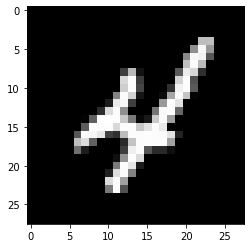

In [5]:
plt.figure(figsize=(6,4))
plt.imshow(train_img[9],cmap='gray')

In [6]:
train_lab[9]

4

## **Preparing Data**

In [13]:
from keras.utils import to_categorical

In [12]:
flat_train_img = train_img.reshape(-1,train_img.shape[1]*train_img.shape[2])/255
flat_test_img = test_img.reshape(-1,test_img.shape[1]*test_img.shape[2])/255

In [14]:
en_train_lab = to_categorical(train_lab)
en_test_lab = to_categorical(test_lab)

# **Network Building**

In [22]:
from keras.models import Sequential, load_model
from keras.layers import Dense

In [17]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(28*28,)))
model.add(Dense(10,activation='softmax'))

In [18]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

In [71]:
model.fit(flat_train_img,en_train_lab,epochs=5,batch_size=32,verbose=1,validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0799 - acc: 0.9768 - val_loss: 0.0972 - val_acc: 0.9728
Epoch 2/5
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0721 - acc: 0.9791 - val_loss: 0.0951 - val_acc: 0.9737
Epoch 3/5
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0663 - acc: 0.9820 - val_loss: 0.1013 - val_acc: 0.9732
Epoch 4/5
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0611 - acc: 0.9830 - val_loss: 0.1079 - val_acc: 0.9725
Epoch 5/5
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0562 - acc: 0.9845 - val_loss: 0.0964 - val_acc: 0.9747


In [72]:
model.save('/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/models/model1.h5')

# **Model Evaluation**

In [73]:
dict_ = model.history.history
dict_.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

**Training v/s Validation**

In [74]:
train_acc = dict_['acc']
val_acc = dict_['val_acc']
train_loss = dict_['loss']
val_loss = dict_['val_loss']
epochs = range(len(train_acc))

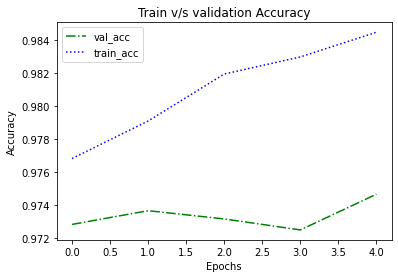

In [75]:
plt.plot(epochs,val_acc,ls='-.',color='green',label='val_acc')
plt.plot(epochs,train_acc,ls=':',color='blue',label='train_acc')
plt.legend()
plt.title('Train v/s validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.show()

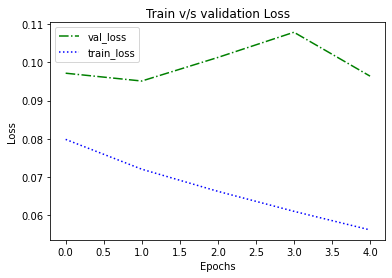

In [76]:
plt.plot(epochs,val_loss,ls='-.',color='green',label='val_loss')
plt.plot(epochs,train_loss,ls=':',color='blue',label='train_loss')
plt.legend()
plt.title('Train v/s validation Loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.show()

**Results on test data**

**Overall loss nd accuracy**

In [77]:
loss,acc = model.evaluate(flat_test_img,en_test_lab)

313/313 [==============================] - 0s 1ms/step - loss: 0.1070 - acc: 0.9734


In [78]:
print('Loss: ',loss)
print('Acc: ',acc)

Loss:  0.10703728348016739
Acc:  0.9733999967575073


**precision, recall and f1-score on a per-class basis**

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [80]:
preds = model.predict(flat_test_img)

In [81]:
pred_lab = preds.argmax(axis=1)
pred_lab.shape, en_test_lab.shape, test_lab.shape

((10000,), (10000, 10), (10000,))

In [82]:
print(classification_report(pred_lab,test_lab))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       995
           1       0.99      0.99      0.99      1138
           2       0.98      0.96      0.97      1046
           3       0.98      0.97      0.97      1023
           4       0.98      0.98      0.98       976
           5       0.96      0.98      0.97       882
           6       0.98      0.96      0.97       980
           7       0.97      0.96      0.96      1033
           8       0.94      0.98      0.96       933
           9       0.96      0.98      0.97       994

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [83]:
accuracy_score(pred_lab,test_lab) #same as we got usinh model.evaluate

0.9734